In [1]:
import numpy as np

In [5]:
np.arange(1600)

array([   0,    1,    2, ..., 1597, 1598, 1599])

In [2]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

In [3]:
signal_data

array([[1.        ],
       [0.99802673],
       [0.9921147 ],
       ...,
       [0.98228725],
       [0.9921147 ],
       [0.99802673]])

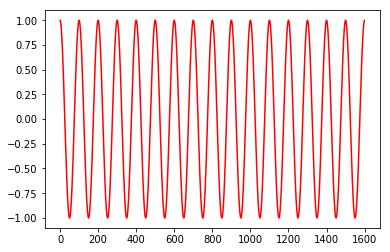

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y, 'r')
plt.show()

In [7]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

In [10]:
signal_data

array([[1.        ],
       [0.99901336],
       [0.99605735],
       ...,
       [0.99114363],
       [0.99605735],
       [0.99901336]])

In [11]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

In [13]:
signal_data.shape

(1600, 1)

In [12]:
train.shape

(800, 1)

In [24]:
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [15]:
x_train

array([[1.        , 0.99901336, 0.99605735, ..., 0.15772645, 0.13551569,
        0.11474338],
       [0.99901336, 0.99605735, 0.99114363, ..., 0.13551569, 0.11474338,
        0.0954915 ],
       [0.99605735, 0.99114363, 0.98429158, ..., 0.11474338, 0.0954915 ,
        0.07783604],
       ...,
       [0.04758647, 0.06184666, 0.07783604, ..., 0.96488824, 0.97552826,
        0.98429158],
       [0.06184666, 0.07783604, 0.0954915 , ..., 0.97552826, 0.98429158,
        0.99114363],
       [0.07783604, 0.0954915 , 0.11474338, ..., 0.98429158, 0.99114363,
        0.99605735]])

In [16]:
x_train.shape

(760, 40)

In [22]:
print(signal_data[40])
print(y_train[0])

[0.0954915]
0.09549150281252633


In [28]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
x_train.shape

(760, 40, 1)

In [30]:
x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [32]:
x_train.shape

(760, 40)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


## 다층 퍼셉트론 

In [27]:
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

In [33]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 6s 8ms/step - loss: 0.1704 - val_loss: 0.0252
Epoch 2/200
760/760 [==============================] - 0s 130us/step - loss: 0.0564 - val_loss: 0.0089
Epoch 3/200
760/760 [==============================] - 0s 134us/step - loss: 0.0444 - val_loss: 0.0047
Epoch 4/200
760/760 [==============================] - 0s 134us/step - loss: 0.0407 - val_loss: 0.0107
Epoch 5/200
760/760 [==============================] - 0s 134us/step - loss: 0.0341 - val_loss: 0.0118
Epoch 6/200
760/760 [==============================] - 0s 129us/step - loss: 0.0388 - val_loss: 0.0138
Epoch 7/200
760/760 [==============================] - 0s 130us/step - loss: 0.0317 - val_loss: 0.0135
Epoch 8/200
760/760 [==============================] - 0s 136us/step - loss: 0.0282 - val_loss: 0.0031
Epoch 9/200
760/760 [==============================] - 0s 142us/step - loss: 0.0294 - val_loss: 0.0099
Epoch 10/200
760/760 [=======

760/760 [==============================] - 0s 138us/step - loss: 0.0118 - val_loss: 0.0082
Epoch 80/200
760/760 [==============================] - 0s 130us/step - loss: 0.0129 - val_loss: 0.0077
Epoch 81/200
760/760 [==============================] - 0s 138us/step - loss: 0.0135 - val_loss: 0.0073
Epoch 82/200
760/760 [==============================] - 0s 144us/step - loss: 0.0137 - val_loss: 0.0081
Epoch 83/200
760/760 [==============================] - 0s 148us/step - loss: 0.0116 - val_loss: 0.0092
Epoch 84/200
760/760 [==============================] - 0s 138us/step - loss: 0.0129 - val_loss: 0.0080
Epoch 85/200
760/760 [==============================] - 0s 125us/step - loss: 0.0134 - val_loss: 0.0070
Epoch 86/200
760/760 [==============================] - 0s 129us/step - loss: 0.0123 - val_loss: 0.0090
Epoch 87/200
760/760 [==============================] - 0s 130us/step - loss: 0.0132 - val_loss: 0.0087
Epoch 88/200
760/760 [==============================] - 0s 140us/step - loss:

760/760 [==============================] - 0s 154us/step - loss: 0.0110 - val_loss: 0.0093
Epoch 158/200
760/760 [==============================] - 0s 148us/step - loss: 0.0096 - val_loss: 0.0093
Epoch 159/200
760/760 [==============================] - 0s 136us/step - loss: 0.0102 - val_loss: 0.0091
Epoch 160/200
760/760 [==============================] - 0s 129us/step - loss: 0.0089 - val_loss: 0.0096
Epoch 161/200
760/760 [==============================] - 0s 127us/step - loss: 0.0099 - val_loss: 0.0094
Epoch 162/200
760/760 [==============================] - 0s 129us/step - loss: 0.0090 - val_loss: 0.0093
Epoch 163/200
760/760 [==============================] - 0s 129us/step - loss: 0.0089 - val_loss: 0.0092
Epoch 164/200
760/760 [==============================] - 0s 129us/step - loss: 0.0089 - val_loss: 0.0097
Epoch 165/200
760/760 [==============================] - 0s 126us/step - loss: 0.0108 - val_loss: 0.0092
Epoch 166/200
760/760 [==============================] - 0s 147us/ste

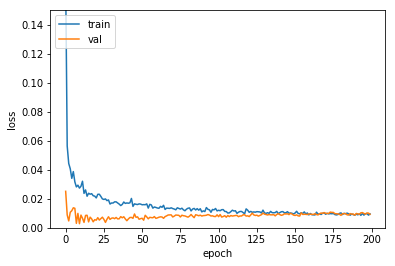

In [34]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)

Train Score:  0.009142909203901102


In [37]:
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)

Validataion Score:  0.009382207588189178


In [38]:
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Test Score:  0.009382207588189178


In [41]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
print(predictions.shape)

(250, 1)


In [43]:
xhat.shape

(1, 40)

In [44]:
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])

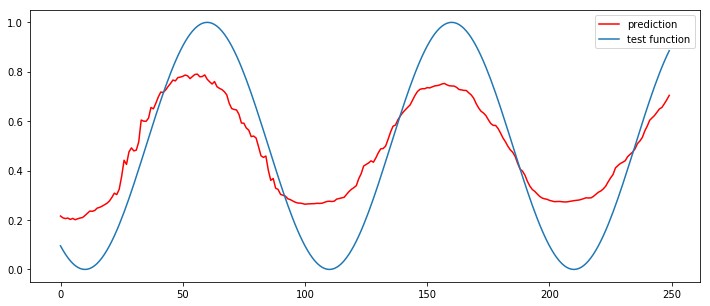

In [45]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

## LSTM (순환 신경망)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [50]:
look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [52]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 3ms/step - loss: 0.1459 - val_loss: 0.0370
Epoch 2/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0364 - val_loss: 0.0227
Epoch 3/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0267 - val_loss: 0.0151
Epoch 4/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.0088
Epoch 5/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0150 - val_loss: 0.0045
Epoch 6/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.0021
Epoch 7/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 8/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 9.9995e-04
Epoch 9/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 7.8009e-04
Epoch 10/200
760/760 [===============

760/760 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 2.0799e-04
Epoch 79/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 1.6011e-04
Epoch 80/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 5.7163e-05
Epoch 81/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 1.9222e-04
Epoch 82/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 8.3079e-05
Epoch 83/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 7.5977e-05
Epoch 84/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 1.4811e-04
Epoch 85/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 5.2457e-05
Epoch 86/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 1.7838e-04
Epoch 87/200
760/760 [==============================] - 1s 

Epoch 155/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0020 - val_loss: 7.2243e-05
Epoch 156/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 2.8491e-04
Epoch 157/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 1.0056e-04
Epoch 158/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 1.9268e-04
Epoch 159/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 9.9694e-05
Epoch 160/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 3.7907e-05
Epoch 161/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 2.5650e-04
Epoch 162/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 2.7324e-05
Epoch 163/200
760/760 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 6.9474e-05
Epoch 164/200
760/760 [==============

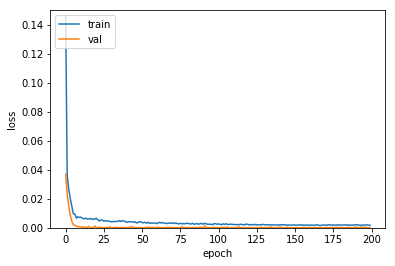

In [54]:
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)


Train Score:  0.00012758577569528778
Validataion Score:  0.0001315217093279999
Test Score:  0.0001315217093279999


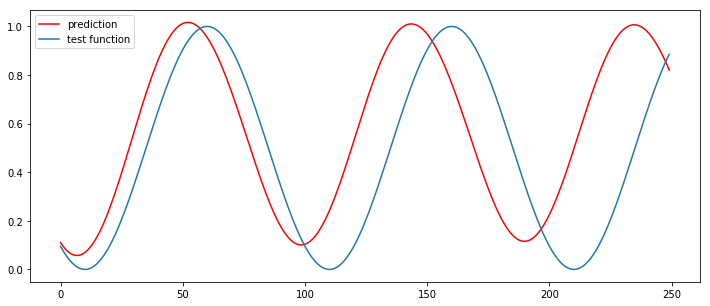

In [56]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()